In [13]:
from scripts.data_ingestion import fetch_data, save_data, find_outliers
import pandas as pd

In [14]:
df_complete = pd.read_csv("data/raw/electric_vehicles_data.csv")
df_complete.head()

,vin_1_10,county,city,state,zip_code,model_year,make,model,ev_type,cafv_type,electric_range,base_msrp,legislative_district,dol_vehicle_id,geocoded_column,electric_utility,_2020_census_tract,:@computed_region_x4ys_rtnd,:@computed_region_fny7_vc3j,:@computed_region_8ddd_yn5v
0,5YJSA1E65N,Yakima,Granger,WA,98932.0,2022,TESLA,MODEL S,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,15.0,187279214,"{'type': 'Point', 'coordinates': [-120.1871, 4...",PACIFICORP,5.307700e+10,2746.0,4.0,22.0
1,KNDC3DLC5N,Yakima,Yakima,WA,98902.0,2022,KIA,EV6,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,15.0,210098241,"{'type': 'Point', 'coordinates': [-120.52041, ...",PACIFICORP,5.307700e+10,2746.0,4.0,20.0
2,5YJYGDEEXL,Snohomish,Everett,WA,98208.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,44.0,121781950,"{'type': 'Point', 'coordinates': [-122.18637, ...",PUGET SOUND ENERGY INC,5.306104e+10,3213.0,1.0,45.0
3,3C3CFFGE1G,Yakima,Yakima,WA,98908.0,2016,FIAT,500,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84,0,14.0,180778377,"{'type': 'Point', 'coordinates': [-120.60199, ...",PACIFICORP,5.307700e+10,2746.0,4.0,20.0
4,KNDCC3LD5K,Kitsap,Bremerton,WA,98312.0,2019,KIA,NIRO,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26,0,26.0,2581225,"{'type': 'Point', 'coordinates': [-122.65223, ...",PUGET SOUND ENERGY INC,5.303508e+10,848.0,6.0,33.0


In [15]:
print(f"Dataset shape: {df_complete.shape}")
df_complete.describe()

Dataset shape: (10000, 20)


,zip_code,model_year,electric_range,base_msrp,legislative_district,dol_vehicle_id,_2020_census_tract,:@computed_region_x4ys_rtnd,:@computed_region_fny7_vc3j,:@computed_region_8ddd_yn5v
count,9997.000000,10000.000000,10000.000000,10000.000000,9997.000000,1.000000e+04,9.997000e+03,9996.000000,9997.000000,9997.000000
mean,98184.267280,2021.501700,47.172500,714.972500,34.238171,2.371358e+08,5.303357e+10,2876.712285,5.473342,29.974792
std,233.007861,3.060675,84.664991,6818.472867,14.150940,6.951379e+07,1.235569e+07,509.070325,3.170778,16.415741
min,98001.000000,2008.000000,0.000000,0.000000,1.000000,1.100570e+05,5.300796e+10,848.000000,1.000000,1.000000
25%,98033.000000,2020.000000,0.000000,0.000000,23.000000,2.070120e+08,5.303300e+10,3009.000000,2.000000,20.000000
50%,98103.000000,2023.000000,0.000000,0.000000,41.000000,2.554680e+08,5.303302e+10,3009.000000,7.000000,31.000000
75%,98178.000000,2024.000000,40.000000,0.000000,46.000000,2.728032e+08,5.303303e+10,3009.000000,8.000000,46.000000
max,99362.000000,2026.000000,337.000000,184400.000000,49.000000,4.786118e+08,5.307794e+10,3214.000000,10.000000,49.000000


In [16]:
# Check data info and missing values
print("Dataset info:")
df_complete.info()
print("\nMissing values:")
print(df_complete.isnull().sum())

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   vin_1_10                     10000 non-null  object 
 1   county                       9997 non-null   object 
 2   city                         9997 non-null   object 
 3   state                        10000 non-null  object 
 4   zip_code                     9997 non-null   float64
 5   model_year                   10000 non-null  int64  
 6   make                         10000 non-null  object 
 7   model                        10000 non-null  object 
 8   ev_type                      10000 non-null  object 
 9   cafv_type                    10000 non-null  object 
 10  electric_range               10000 non-null  int64  
 11  base_msrp                    10000 non-null  int64  
 12  legislative_district         9997 non-null   float64
 13  dol

In [17]:
# Clean the data by dropping null values
df_clean = df_complete.dropna()
print(f"Original shape: {df_complete.shape}")
print(f"After dropping nulls: {df_clean.shape}")
print(f"Rows removed: {df_complete.shape[0] - df_clean.shape[0]}")
df_clean.info()

Original shape: (10000, 20)
After dropping nulls: (9996, 20)
Rows removed: 4
<class 'pandas.core.frame.DataFrame'>
Index: 9996 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   vin_1_10                     9996 non-null   object 
 1   county                       9996 non-null   object 
 2   city                         9996 non-null   object 
 3   state                        9996 non-null   object 
 4   zip_code                     9996 non-null   float64
 5   model_year                   9996 non-null   int64  
 6   make                         9996 non-null   object 
 7   model                        9996 non-null   object 
 8   ev_type                      9996 non-null   object 
 9   cafv_type                    9996 non-null   object 
 10  electric_range               9996 non-null   int64  
 11  base_msrp                    9996 non-null   int64  
 12  legi

In [18]:
df_clean.drop(columns=[':@computed_region_x4ys_rtnd',	':@computed_region_fny7_vc3j',	':@computed_region_8ddd_yn5v'], inplace=True)

/tmp/ipykernel_13340/4070719182.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.drop(columns=[':@computed_region_x4ys_rtnd',	':@computed_region_fny7_vc3j',	':@computed_region_8ddd_yn5v'], inplace=True)


Numeric columns available: ['zip_code', 'model_year', 'electric_range', 'base_msrp', 'legislative_district', 'dol_vehicle_id', '_2020_census_tract']


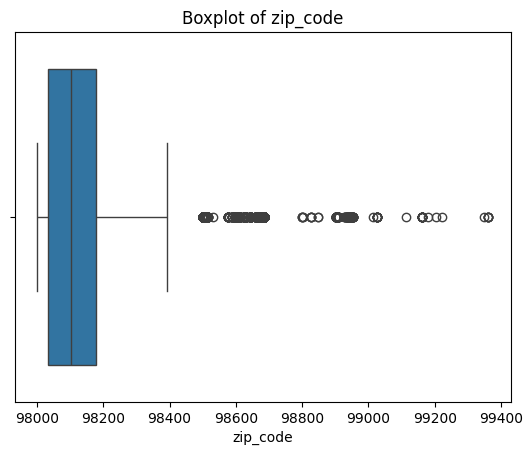

Found 1616 outliers
      vin_1_10  county     city state  zip_code  model_year       make  \
0   5YJSA1E65N  Yakima  Granger    WA   98932.0        2022      TESLA   
1   KNDC3DLC5N  Yakima   Yakima    WA   98902.0        2022        KIA   
3   3C3CFFGE1G  Yakima   Yakima    WA   98908.0        2016       FIAT   
9   1G1RD6S55K  Yakima   Yakima    WA   98908.0        2019  CHEVROLET   
24  5YJ3E1EB2L  Yakima   Yakima    WA   98902.0        2020      TESLA   

      model                                 ev_type  \
0   MODEL S          Battery Electric Vehicle (BEV)   
1       EV6          Battery Electric Vehicle (BEV)   
3       500          Battery Electric Vehicle (BEV)   
9      VOLT  Plug-in Hybrid Electric Vehicle (PHEV)   
24  MODEL 3          Battery Electric Vehicle (BEV)   

                                            cafv_type  electric_range  \
0   Eligibility unknown as battery range has not b...               0   
1   Eligibility unknown as battery range has not b...     

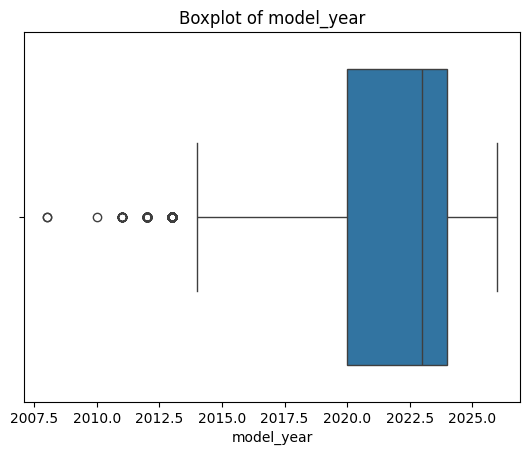

Found 246 outliers
      vin_1_10    county       city state  zip_code  model_year    make  \
11  1N4AZ0CP1D      King    Seattle    WA   98119.0        2013  NISSAN   
20  1N4AZ0CP4D    Kitsap  Bremerton    WA   98310.0        2013  NISSAN   
23  1N4AZ0CP0D      King    Seattle    WA   98125.0        2013  NISSAN   
36  1FADP5CU3D  Thurston       Yelm    WA   98597.0        2013    FORD   
44  1N4AZ0CP8D      King  Shoreline    WA   98133.0        2013  NISSAN   

    model                                 ev_type  \
11   LEAF          Battery Electric Vehicle (BEV)   
20   LEAF          Battery Electric Vehicle (BEV)   
23   LEAF          Battery Electric Vehicle (BEV)   
36  C-MAX  Plug-in Hybrid Electric Vehicle (PHEV)   
44   LEAF          Battery Electric Vehicle (BEV)   

                                  cafv_type  electric_range  base_msrp  \
11  Clean Alternative Fuel Vehicle Eligible              75          0   
20  Clean Alternative Fuel Vehicle Eligible              75    

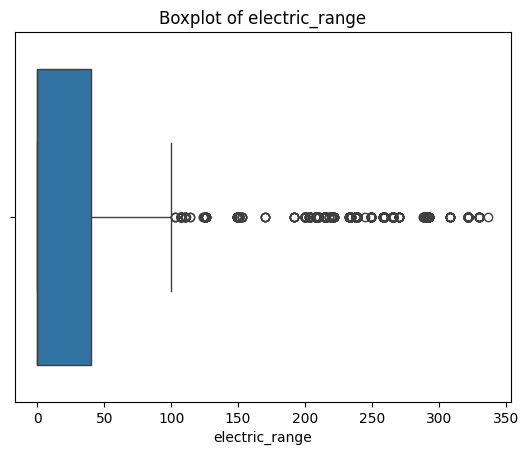

Found 1651 outliers
      vin_1_10     county          city state  zip_code  model_year  \
2   5YJYGDEEXL  Snohomish       Everett    WA   98208.0        2020   
5   5YJXCAE29L     Kitsap    Silverdale    WA   98383.0        2020   
6   5YJ3E1EB6L       King          Kent    WA   98030.0        2020   
8   1G1FY6S07L     Kitsap  Port Orchard    WA   98367.0        2020   
10  WA1VABGE7K       King     Shoreline    WA   98133.0        2019   

         make    model                         ev_type  \
2       TESLA  MODEL Y  Battery Electric Vehicle (BEV)   
5       TESLA  MODEL X  Battery Electric Vehicle (BEV)   
6       TESLA  MODEL 3  Battery Electric Vehicle (BEV)   
8   CHEVROLET  BOLT EV  Battery Electric Vehicle (BEV)   
10       AUDI   E-TRON  Battery Electric Vehicle (BEV)   

                                  cafv_type  electric_range  base_msrp  \
2   Clean Alternative Fuel Vehicle Eligible             291          0   
5   Clean Alternative Fuel Vehicle Eligible             

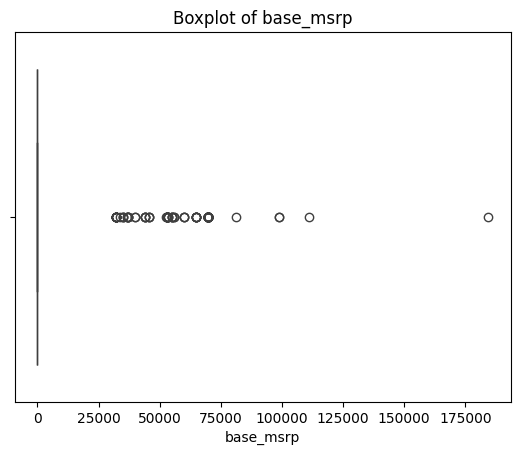

Found 121 outliers
       vin_1_10    county     city state  zip_code  model_year   make  \
73   5YJSA1DP4D    Yakima   Zillah    WA   98953.0        2013  TESLA   
119  WMZYU7C56K    Yakima   Wapato    WA   98951.0        2019   MINI   
150  5YJSA1H17E  Thurston  Olympia    WA   98502.0        2014  TESLA   
189  KNDJX3AE6G   Whitman  Palouse    WA   99161.0        2016    KIA   
191  5YJSA1CN1D   Whitman  Pullman    WA   99163.0        2013  TESLA   

          model                                 ev_type  \
73      MODEL S          Battery Electric Vehicle (BEV)   
119  COUNTRYMAN  Plug-in Hybrid Electric Vehicle (PHEV)   
150     MODEL S          Battery Electric Vehicle (BEV)   
189        SOUL          Battery Electric Vehicle (BEV)   
191     MODEL S          Battery Electric Vehicle (BEV)   

                                   cafv_type  electric_range  base_msrp  \
73   Clean Alternative Fuel Vehicle Eligible             208      69900   
119    Not eligible due to low batter

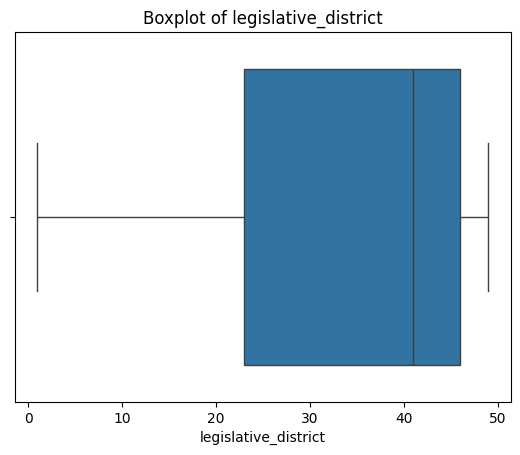

Found 0 outliers
Empty DataFrame
Columns: [vin_1_10, county, city, state, zip_code, model_year, make, model, ev_type, cafv_type, electric_range, base_msrp, legislative_district, dol_vehicle_id, geocoded_column, electric_utility, _2020_census_tract]
Index: []
Numeric columns available: ['zip_code', 'model_year', 'electric_range', 'base_msrp', 'legislative_district', 'dol_vehicle_id', '_2020_census_tract']


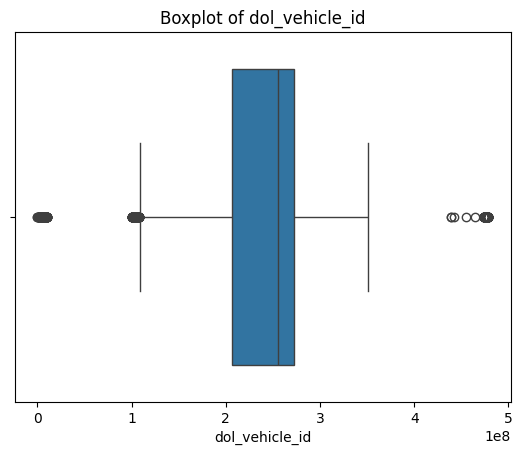

Found 604 outliers
      vin_1_10  county        city state  zip_code  model_year       make  \
4   KNDCC3LD5K  Kitsap   Bremerton    WA   98312.0        2019        KIA   
5   5YJXCAE29L  Kitsap  Silverdale    WA   98383.0        2020      TESLA   
9   1G1RD6S55K  Yakima      Yakima    WA   98908.0        2019  CHEVROLET   
16  5YJ3E1EA6L    King     Tukwila    WA   98168.0        2020      TESLA   
17  5YJ3E1EA4J  Kitsap     Poulsbo    WA   98370.0        2018      TESLA   

      model                                 ev_type  \
4      NIRO  Plug-in Hybrid Electric Vehicle (PHEV)   
5   MODEL X          Battery Electric Vehicle (BEV)   
9      VOLT  Plug-in Hybrid Electric Vehicle (PHEV)   
16  MODEL 3          Battery Electric Vehicle (BEV)   
17  MODEL 3          Battery Electric Vehicle (BEV)   

                                  cafv_type  electric_range  base_msrp  \
4     Not eligible due to low battery range              26          0   
5   Clean Alternative Fuel Vehicle Elig

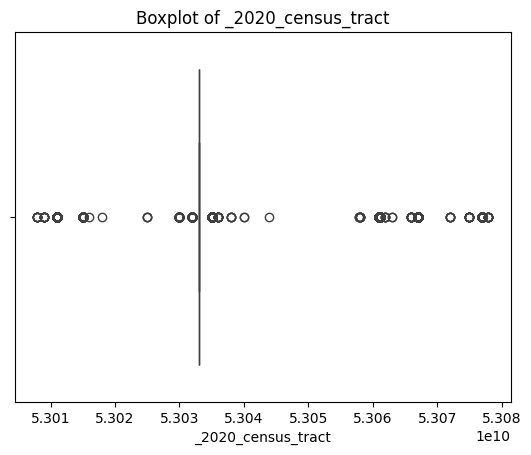

Found 2777 outliers
     vin_1_10     county       city state  zip_code  model_year   make  \
0  5YJSA1E65N     Yakima    Granger    WA   98932.0        2022  TESLA   
1  KNDC3DLC5N     Yakima     Yakima    WA   98902.0        2022    KIA   
2  5YJYGDEEXL  Snohomish    Everett    WA   98208.0        2020  TESLA   
3  3C3CFFGE1G     Yakima     Yakima    WA   98908.0        2016   FIAT   
4  KNDCC3LD5K     Kitsap  Bremerton    WA   98312.0        2019    KIA   

     model                                 ev_type  \
0  MODEL S          Battery Electric Vehicle (BEV)   
1      EV6          Battery Electric Vehicle (BEV)   
2  MODEL Y          Battery Electric Vehicle (BEV)   
3      500          Battery Electric Vehicle (BEV)   
4     NIRO  Plug-in Hybrid Electric Vehicle (PHEV)   

                                           cafv_type  electric_range  \
0  Eligibility unknown as battery range has not b...               0   
1  Eligibility unknown as battery range has not b...              

In [19]:
numeric_cols = df_clean.select_dtypes(include=['number']).columns

if len(numeric_cols) > 0:
    for i in range(len(numeric_cols)):
        print(f"Numeric columns available: {list(numeric_cols)}")
        outliers = find_outliers(df_clean, numeric_cols[i])
        print(f"Found {len(outliers)} outliers")
        print(outliers.head())
else:
    print("No numeric columns found for outlier detection")

In [20]:
# Check for duplicates
duplicates = df_clean.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


In [21]:
save_data(df_clean, "data/processed/electric_vehicles_cleaned.csv")

Data saved to data/processed/electric_vehicles_cleaned.csv
